# Exploratory Data Analysis (EDA) of ETFs

Original data from https://s3.amazonaws.com/zanran_storage/www.etftopics.com/ContentPages/13968652.xls , modified and available locally as ETFs.csv . 

This notebook only works in Quantopian Research, but one only needs to modify the loading of the file to work with it locally.

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [194]:
ETFs = local_csv('ETFs.csv', skipinitialspace=True, 
                    na_values=['n/a','NaN'], thousands=',')
ETFs = ETFs.set_index('Symbol')
ETFs[:2]

,Name,Index,Description,Category,Provider,Expense_Ratio,Dividend,Div_Yield,Market_Cap,Shares,...,Beta,Asset,Size,Style,Region,Sector,Leveraged,Inverse,Top_Holdings,Chart
Symbol,,,,,,,,,,,,,,,,,,,,,
AAXJ,iShares MSCI All Country Asia ex Japan Index Fund,MSCI All Country Asia ex Japan Index,The index measures the performance of 11 devel...,Asia Pacific Equities,iShares,0.7400%,$0.36,1.8400%,"$1,687.89",31,...,1,Equity,NaN,NaN,Pacific ex-Japan,NaN,NaN,NaN,NaN,NaN
ACWI,MSCI All Country World Index Fund,MSCI All Country World Index,The Index is designed to measure the performan...,Global Equities,iShares,0.3500%,$0.36,1.4100%,"$1,176.64",30,...,1,Equity,Large-Cap,Blend,Global/Multi-Region,NaN,NaN,NaN,NaN,NaN


In [195]:
del ETFs['Top_Holdings']
del ETFs['Chart']

In [196]:
ETFs.columns

Index([u'Name', u'Index', u'Description', u'Category', u'Provider', u'Expense_Ratio', u'Dividend', u'Div_Yield', u'Market_Cap', u'Shares', u'Avg_Vol', u'Beta', u'Asset', u'Size', u'Style', u'Region', u'Sector', u'Leveraged', u'Inverse'], dtype='object')

In [197]:
def p2f(x):
    if type(x) is str:
        return float(x.strip('%'))/100
    else:
        return x / 100

def d2f(x):
    if type(x) is str:
        return float(x.strip('$').replace(',',''))
    else:
        return x

def s2b(x):
    if type(x) is str:
        if x == 'Yes':
            return True
        else:
            return False
    else:
        return False        

In [198]:
# Apply conversions
ETFs.Expense_Ratio = ETFs.Expense_Ratio.apply(p2f) 
ETFs.Dividend = ETFs.Dividend.apply(d2f)
ETFs.Div_Yield = ETFs.Div_Yield.apply(p2f)
ETFs.Market_Cap = ETFs.Market_Cap.apply(d2f)
ETFs.Inverse = ETFs.Inverse.apply(s2b)
ETFs[:3]

,Name,Index,Description,Category,Provider,Expense_Ratio,Dividend,Div_Yield,Market_Cap,Shares,Avg_Vol,Beta,Asset,Size,Style,Region,Sector,Leveraged,Inverse
Symbol,,,,,,,,,,,,,,,,,,,
AAXJ,iShares MSCI All Country Asia ex Japan Index Fund,MSCI All Country Asia ex Japan Index,The index measures the performance of 11 devel...,Asia Pacific Equities,iShares,0.0074,0.36,0.0184,1687.89,31,527890,1,Equity,NaN,NaN,Pacific ex-Japan,NaN,NaN,False
ACWI,MSCI All Country World Index Fund,MSCI All Country World Index,The Index is designed to measure the performan...,Global Equities,iShares,0.0035,0.36,0.0141,1176.64,30,379781,1,Equity,Large-Cap,Blend,Global/Multi-Region,NaN,NaN,False
ACWX,iShares MSCI ACWI ex US Index Fund,MSCI All Country World ex-U.S. Index,The index measures the performance of global e...,Global Equities,iShares,0.0035,0.52,0.0147,654.07,17,161924,1,Equity,Large-Cap,Blend,Ex-U.S.,NaN,NaN,False


In [199]:
len(ETFs.index)

1020

In [223]:
ETFs.Category.value_counts()

Leveraged Equities                   120
Emerging Markets Equities             46
Energy Equities                       40
Large Cap Value Equities              36
Technology Equities                   32
Large Cap Blend Equities              30
Currency                              29
Financials Equities                   28
Europe Equities                       25
Foreign Large Cap Equities            25
Health & Biotech Equities             22
National Munis                        21
Commodities                           19
All Cap Equities                      19
Commodity Producers Equities          18
Precious Metals                       18
Government Bonds                      18
Leveraged Commodities                 18
Large Cap Growth Equities             18
Asia Pacific Equities                 17
China Equities                        16
Quantitative Methodology Indexes      16
Global Equities                       16
Oil & Gas                             15
Inverse Equities

In [222]:
ETFs.Provider.value_counts()

iShares                    201
Invesco PowerShares        146
ProShares                  111
State Street                89
Wisdom Tree                 52
Vanguard                    46
First Trust                 44
Rydex                       40
Barclays iPath              38
Claymore                    36
Direxion                    34
Van Eck                     29
Merrill Lynch HOLDRs        17
ELEMENTS                    16
UBS                         13
PIMCO                       10
Global X                    10
IndexIQ                      9
Charles Schwab               8
Grail Advisors               7
US Commodity Funds           7
EG Shares                    6
XShares                      6
RevenueShares                6
GlobalShares                 5
FaithShares                  5
ETF Securities               4
MacroMarkets                 4
Jefferies                    4
Credit Suisse                2
JP Morgan                    2
Javelin Funds                2
Geary Ad

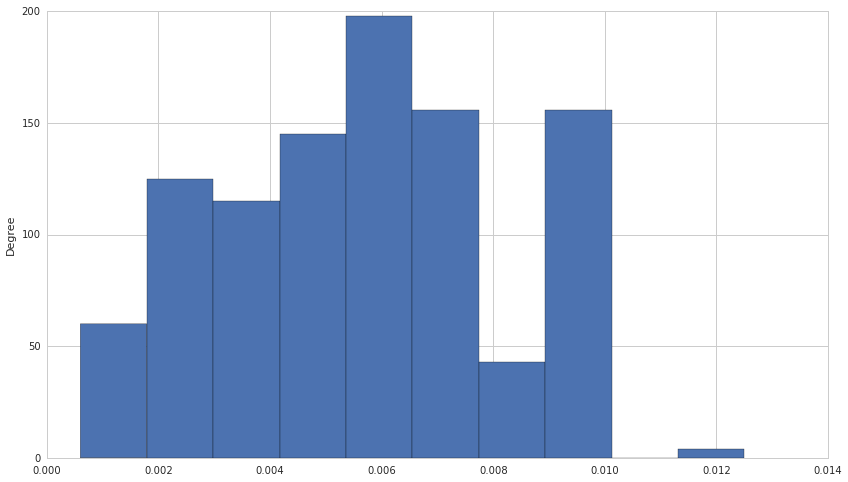

In [202]:
ETFs.Expense_Ratio.plot(kind='hist')

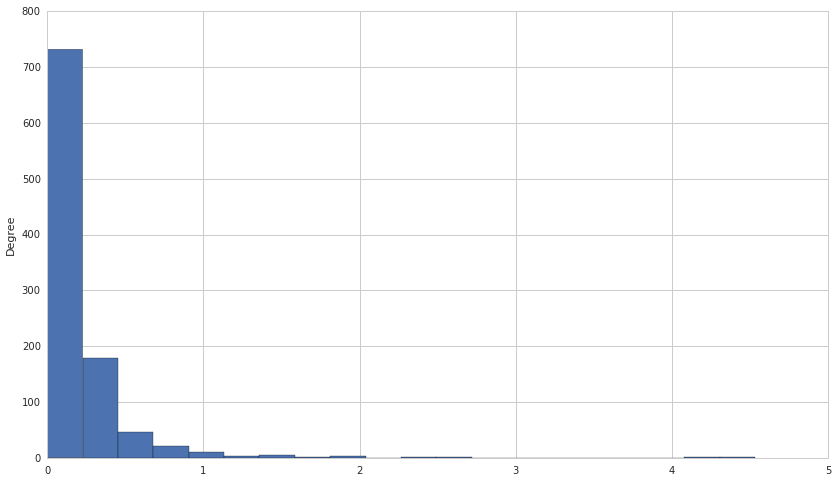

In [203]:
ETFs.Dividend.plot(kind='hist', bins=20)

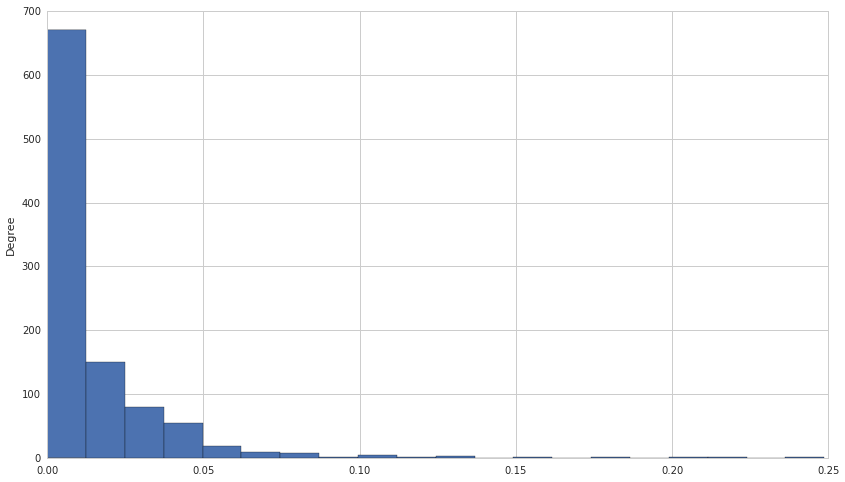

In [204]:
ETFs.Div_Yield.plot(kind='hist', bins=20)

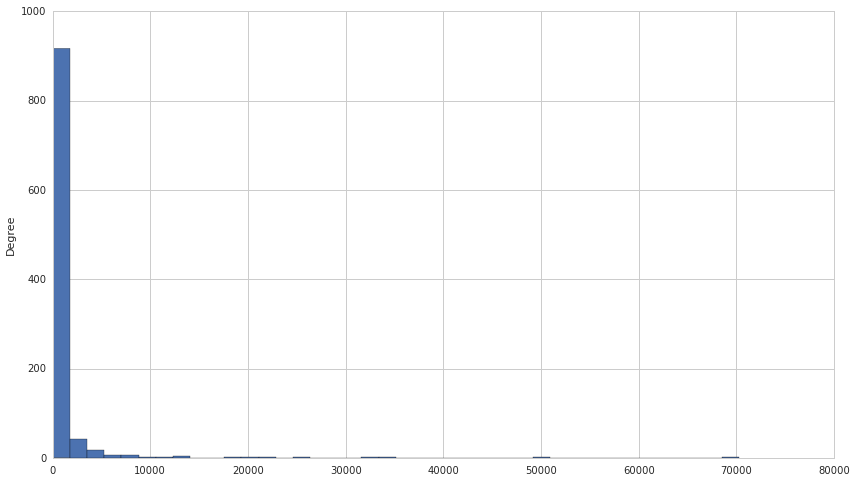

In [205]:
ETFs.Market_Cap.plot(kind='hist',bins=40)

In [221]:
ETFs.Asset.value_counts()

Equity         725
Bond           106
Commodity      100
Currency        35
Real Estate     28
Multi-Asset     26
dtype: int64

In [220]:
ETFs.Size.value_counts()

Large-Cap    205
Small-Cap     79
Mid-Cap       53
Multi-Cap     24
dtype: int64

In [219]:
ETFs.Style.value_counts()

Blend     177
Value      85
Growth     59
dtype: int64

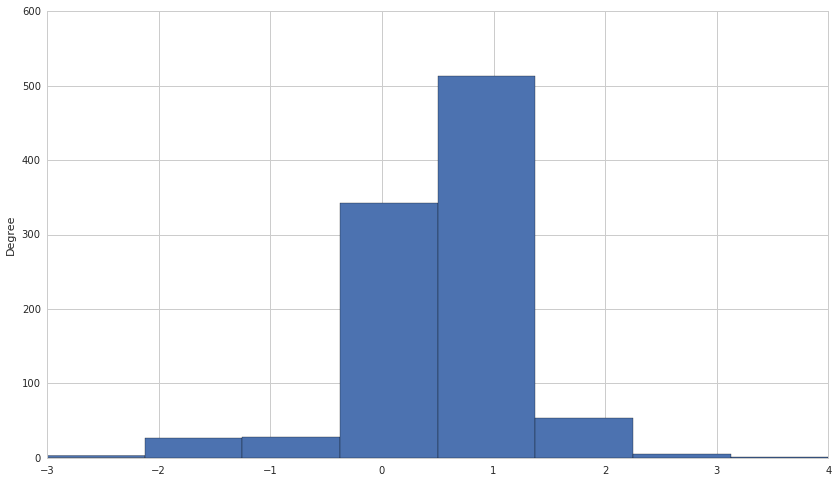

In [209]:
ETFs.Beta.plot(kind='hist',bins=8)

In [218]:
ETFs.Region.value_counts()

U.S.                   460
Global/Multi-Region    107
Emerging Markets        28
China                   20
Europe                  15
Japan                   10
Developed Markets        9
Ex-U.S.                  9
EAFE                     8
Asia                     7
India                    6
Pacific ex-Japan         6
BRIC                     5
Brazil                   5
Latin America            5
Canada                   3
Euro-Pacific             3
Middle East              3
Mexico                   3
South Korea              2
Africa                   2
Taiwan                   2
Australia                2
Russia                   2
Indonesia                2
Middle East/Africa       2
Israel                   1
Colombia                 1
Austria                  1
France                   1
Turkey                   1
Ireland                  1
Italy                    1
Switzerland              1
Malaysia                 1
United Kingdom           1
Germany                  1
P

In [217]:
ETFs.Sector.value_counts()

Energy                     45
Technology                 41
Financial                  41
Industrial                 32
Health & Biotech           25
Utilities                  17
Retail & Consumer          15
Materials                  12
Communications             11
Consumer Staples            6
Consumer Discretionary      6
Transportation              4
Building & Construction     3
Agriculture                 3
Aerospace & Defense         2
Environmental               1
dtype: int64

In [216]:
ETFs.Leveraged.value_counts()

2x    116
3x     44
dtype: int64

In [215]:
ETFs.Inverse.value_counts()

False    914
True     106
dtype: int64

## Places to collect holdings data 

In [213]:
# http://www.etfreplay.com/

In [ ]:
# http://etfdb.com/etf/###
# http://finance.yahoo.com/q/hl?s=### ETF holdings

In [ ]:
# https://accounts.profunds.com/etfdata/ByFund/EFAD-psdlyhld.csv
# http://www.ishares.com/us/products/239709/ishares-russell-2000-growth-etf